last run on 11/10/2016
Windows, py27 

# Blackbody Radiation of a star and a planet

The radiation has a specific spectrum and intensity that depends only on the temperature of the body. The distribution of intensity versus wavelength is distributed following the Planck function

## Planck's Law
\begin{equation}
I(\nu,T) = \frac{2h\nu^3}{c^2}\frac{1}{e^{h\nu/kT}-1}
\end{equation}

see also [astropy example](http://docs.astropy.org/en/stable/constants/)

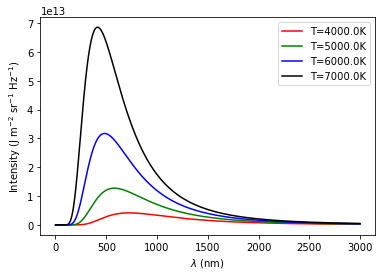

In [5]:
from matplotlib import pylab as pl
%matplotlib inline
import numpy as np

#remove raised error = overflow in numpy
np.seterr(all='ignore')
#to reset
#np.seterr(all='warn', over='raise')

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(lambda_, T):
    a = 2.0*h*c**2
    b = h*c/(lambda_*k*T)
    return a/ ((lambda_**5) * (np.exp(b) - 1.0))

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 3e-6, 1e-9) 

# intensity at T=4000K, 5000K, 6000K, 7000K
temperature = [4.0e3,5.0e3,6.0e3,7.0e3]
I = []
for i in temperature:
    ii = planck(wavelengths, i)
    I.append(ii)
    
colors = ['r-', 'g-', 'b-', 'k-']
#pl.hold(True) # doesn't erase plots on subsequent calls of plt.plot()
counter = 0
for j,c in zip(I,colors):
    pl.plot(wavelengths*1e9, j, c, label='T={}K'.format(temperature[counter]))
    counter+=1

pl.ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
pl.xlabel('$\lambda$ (nm)')
pl.legend()
pl.show()

Make plotting interactive

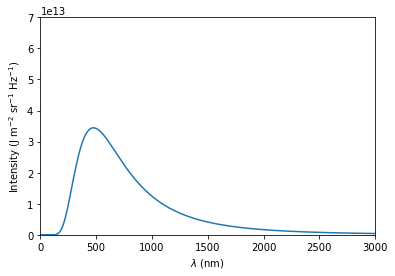

In [3]:
from __future__ import print_function
from ipywidgets import interact #, interactive, fixed
import ipywidgets as widgets

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def plotBB(f):
    fig, ax = pl.subplots(1,1)#1, figsize=(10,5))
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
    ax.set_xlim(0,3000)
    ax.set_ylim(0,7e13)
    ax.plot(wavelengths*1e9, planck(wavelengths, f))
    pl.show()
interact(plotBB, f=(5000,7000,100)); #f corresponds to the temperature

We can find the peak of the blackbody curves using Wien's displacement law.

In [3]:
def Wien(T):
    return 2.8977729e-3/T #m/K

lambda_max= []
for i in temperature:
    j = Wien(i)
    lambda_max.append(j)
    print('{:.2f} nm'.format(j*1e9))
#print('{}'.format(lambda_max*1e6))

724.44 nm
579.55 nm
482.96 nm
413.97 nm


In [4]:
import pandas as pd

d = pd.Series(wavelengths)
df = pd.DataFrame(wavelengths)
d1 = pd.Series(I[0])
d2 = pd.Series(I[1])
d3 = pd.Series(I[2])
d4 = pd.Series(I[3])

df['I1'] = pd.DataFrame(d1) 
df['I2'] = pd.DataFrame(d2)
df['I3'] = pd.DataFrame(d3)
df['I4'] = pd.DataFrame(d4)

df.columns = ['w','I1','I2','I3','I4']
df.tail()

w, I1, I2, I3, I4 = df.w, df.I1, df.I2, df.I3, df.I4

Let's determine the $\lambda_{max}$

In [5]:
I_max = np.array((max(I1), max(I2), max(I3), max(I4)), dtype=float)
wav_max =  np.array((w[I1.idxmax], w[I2.idxmax], w[I3.idxmax], w[I4.idxmax]), dtype=float)
w1 = pd.Series(I_max)
w2 = pd.Series(wav_max)
df2 = pd.DataFrame(w1)
df2['wav_max'] = pd.DataFrame(w2)
df2.columns = ['I_max','wav_max']
df2

,I_max,wav_max
0,4.175620e+12,7.250000e-07
1,1.274298e+13,5.800000e-07
2,3.170855e+13,4.840000e-07
3,6.853465e+13,4.140000e-07


#colors = ['r-', 'g-', 'b-', 'k-']
ax = plt.plot(df)
plt.ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
plt.xlabel('$\lambda$ (nm)')
plt.legend([i for i in temperature])
#plt.legend(df.columns[1:])
plt.vlines(x=wav_max*1e9, ymin=0, ymax=I_max, color='k')
plt.show()

There's a problem with label colors. I will rather use the former plotting method.

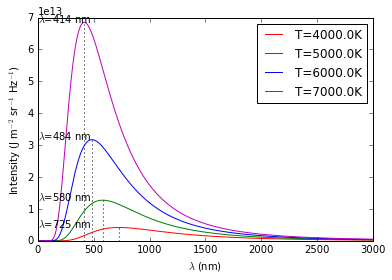

In [6]:
colors = ['r-', 'g-', 'b-', 'm-']
counter = 0
for j,c in zip(I,colors):
    pl.plot(wavelengths*1e9, j, c, label='T={}K'.format(temperature[counter]))
    counter+=1
    pl.ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
pl.vlines(x=wav_max*1e9, ymin=0, ymax=I_max, color='k', linestyles='dotted')
pl.xlabel('$\lambda$ (nm)')
for i,j in zip(wav_max, I_max):
    pl.text(i, j, r'$\lambda$={:.0f} nm'.format(i*1e9), fontsize=10)
pl.legend()
pl.show()

Make plotting interactive

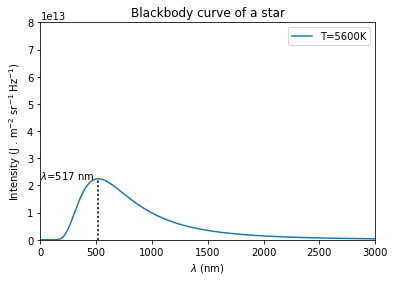

In [6]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def Wien(T):
    return 2.8977729e-3/T #m/K

def plotBB(temp):
    fig, ax = pl.subplots(1,1)#1, figsize=(10,5))
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel('Intensity (J . m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
    ax.set_xlim(0,3000)
    ax.set_ylim(0,8e13)
    ax.set_title('Blackbody curve of a star')
    ax.plot(wavelengths*1e9, planck(wavelengths, temp), label='T={}K'.format(temp))
    wav_peak=Wien(temp)
    I_peak=planck(Wien(temp), temp)
    ax.vlines(x=wav_peak*1e9, ymin=0, ymax=I_peak, color='k', linestyles='dotted')
    ax.text(wav_peak, I_peak, r'$\lambda$={:.0f} nm'.format(wav_peak*1e9), fontsize=10, horizontalalignment='left')
    pl.legend()
    pl.show()
interact(plotBB, temp=(5000,7000,100)); #f corresponds to the temperature

Theoretical models of disks undergoing the accretion of mass from an infalling cloud envelope predict disk temperatures in good agreement with these constraints: a moderately warm (500–1500 K) inner disk, surrounded by a cool (50–150 K) outer disk (Boss, 1998).

I_sum = [x + y for x, y in zip(I_disk[0], I_disk[1])]
len(I_sum)

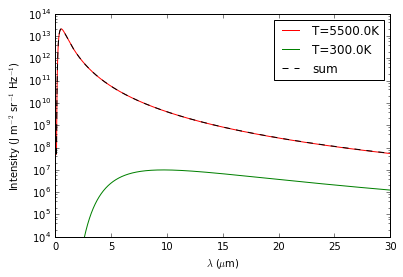

contrast=4.83e-07


In [8]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

temp_disk = [5.5e3, 2*1.5e2] #inner and outer disk in K
wavelengths = np.arange(0.1e-6, 30e-6, 1e-9)  #towards infrared region

I_disk=[]
for idx in temp_disk:
    I2 = planck(wavelengths, idx)
    I_disk.append(I2)

#Sum of 2 intensities
I_sum = I_disk[0]+I_disk[1]

colors = ['r-', 'g-', 'b-', 'm-']
counter = 0

#ax, fig = subplots(1,2,figsize=(15,4))
for j,c in zip(I_disk,colors):
    pl.plot(wavelengths*1e6, j, c, label='T={}K'.format(temp_disk[counter]))
    counter+=1

pl.plot(wavelengths*1e6, I_sum, 'k--', label='sum')
pl.ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
#plt.vlines(x=wav_max*1e9, ymin=0, ymax=I_max, color='k', linestyles='dotted')
pl.xlabel('$\lambda$ ($\mu$m)')
#for i,j in zip(wav_max, I_max):
#    plt.text(i, j, r'$\lambda$={:.0f} nm'.format(i*1e9), fontsize=12)
pl.yscale('log')
#plt.xscale('log')
pl.legend()
pl.ylim([1e4,1e14])
pl.show()

contrast = max(I_disk[1])/max(I_disk[0])
print('contrast={0:.2e}'.format(contrast))

The contribution of the disk to the total spectrum (black dotted lines) is very small such that the difference between the star and the sum spectra negligible. 

Now, we wish to reproduce the bump or excess in the infrared in Spectral Energy Distribution (SED) observed among YSOs.

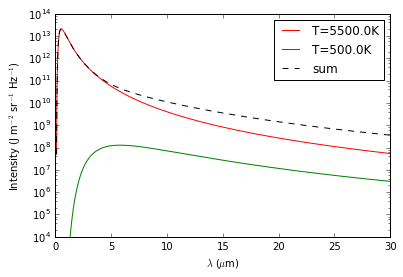

contrast=6.21e-06


In [9]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

temp_disk = [5.5e3, 5e2] #inner and outer disk in K
wavelengths = np.arange(0.1e-6, 30e-6, 1e-9)  #towards infrared region

I_disk=[]
for idx in temp_disk:
    I2 = planck(wavelengths, idx)
    I_disk.append(I2)

#offset the disk/planet's SED to produce bump redward of star's SED
offset=1e2

#Sum of 2 intensities
I_sum = I_disk[0]+I_disk[1]*offset

colors = ['r-', 'g-', 'b-', 'm-']
counter = 0

#ax, fig = subplots(1,2,figsize=(15,4))
for j,c in zip(I_disk,colors):
    pl.plot(wavelengths*1e6, j, c, label='T={}K'.format(temp_disk[counter]))
    counter+=1

pl.plot(wavelengths*1e6, I_sum, 'k--', label='sum')
pl.ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
#plt.vlines(x=wav_max*1e9, ymin=0, ymax=I_max, color='k', linestyles='dotted')
pl.xlabel('$\lambda$ ($\mu$m)')
#for i,j in zip(wav_max, I_max):
#    plt.text(i, j, r'$\lambda$={:.0f} nm'.format(i*1e9), fontsize=12)
pl.yscale('log')
#plt.xscale('log')
pl.legend()
pl.ylim([1e4,1e14])
pl.show()

contrast = max(I_disk[1])/max(I_disk[0])
print('contrast={0:.2e}'.format(contrast))

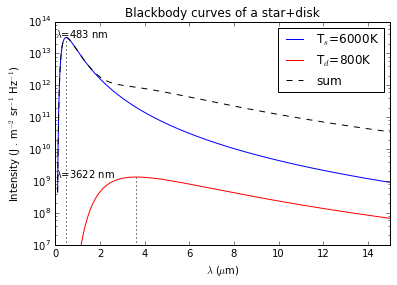

In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

wavelengths = np.arange(0.1e-6, 30e-6, 1e-9)  #towards infrared region

def Wien(T):
    return 2.8977729e-3/T #m/K

def plotBB(t_star, t_disk, disk_offset):
    fig, ax = pl.subplots(1,1)#1, figsize=(10,5))
    ax.set_xlabel('$\lambda$ ($\mu$m)')
    ax.set_ylabel('Intensity (J . m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
    ax.set_xlim(0,15)
    ax.set_ylim(1e7,1e14)
    ax.set_title('Blackbody curves of a star+disk')
    ax.plot(wavelengths*1e6, planck(wavelengths, t_star), 'b-', label='T$_s$={}K'.format(t_star))
    ax.plot(wavelengths*1e6, planck(wavelengths, t_disk), 'r-', label='T$_d$={}K'.format(t_disk))
    I_sum=planck(wavelengths, t_star)+planck(wavelengths, t_disk)*disk_offset
    ax.plot(wavelengths*1e6, I_sum, 'k--', label='sum')
    wav_peak_star=Wien(t_star)
    wav_peak_disk=Wien(t_disk)
    I_peak_star=planck(Wien(t_star), t_star)
    I_peak_disk=planck(Wien(t_disk), t_disk)
    ax.vlines(x=wav_peak_star*1e6, ymin=0, ymax=I_peak_star, color='k', linestyles='dotted')
    ax.vlines(x=wav_peak_disk*1e6, ymin=0, ymax=I_peak_disk, color='k', linestyles='dotted')
    ax.text(wav_peak_star, I_peak_star, r'$\lambda$={:.0f} nm'.format(wav_peak_star*1e9), fontsize=10)
    ax.text(wav_peak_disk, I_peak_disk, r'$\lambda$={:.0f} nm'.format(wav_peak_disk*1e9), fontsize=10)
    ax.set_yscale('log')
    pl.legend()
    pl.show()
interact(plotBB, t_star=(5000,7000,100), t_disk=(150,1500,50), disk_offset=(0,1000,100));

The temperature T=1500 K corresponds to the higher limit of the inner disk temperature. We could probably expect more contribution due to absorption of starlight and reemission on longer wavelengths due to the circumstellar disk.   